# Práctica 02
---

In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib

## Cargar librerías
---

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar dataset
---

In [5]:
df = pd.read_csv('data/data_senamhi.csv')
df.head()

,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE
0,1,CAMPO_DE_MARTE,20150101,50000,-77.0432,-12.0705,117.0,37.92,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
1,2,CAMPO_DE_MARTE,20150101,60000,-77.0432,-12.0705,117.0,153.39,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
2,3,CAMPO_DE_MARTE,20150101,70000,-77.0432,-12.0705,117.0,116.49,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
3,4,CAMPO_DE_MARTE,20150101,80000,-77.0432,-12.0705,117.0,80.74,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531
4,5,CAMPO_DE_MARTE,20150101,90000,-77.0432,-12.0705,117.0,27.40,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577794 entries, 0 to 577793
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            577794 non-null  int64  
 1   ESTACION      577794 non-null  object 
 2   FECHA         577794 non-null  int64  
 3   HORA          577794 non-null  int64  
 4   LONGITUD      577794 non-null  float64
 5   LATITUD       577794 non-null  float64
 6   ALTITUD       577794 non-null  float64
 7   PM10          380982 non-null  float64
 8   PM2_5         367591 non-null  float64
 9   NO2           299192 non-null  float64
 10  DEPARTAMENTO  577794 non-null  object 
 11  PROVINCIA     577794 non-null  object 
 12  DISTRITO      577794 non-null  object 
 13  UBIGEO        577794 non-null  float64
 14  FECHA_CORTE   577794 non-null  int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 66.1+ MB


In [8]:
df.describe()

,ID,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,UBIGEO,FECHA_CORTE
count,577794.000000,5.777940e+05,577794.000000,577794.000000,577794.000000,577794.000000,380982.000000,367591.000000,299192.000000,577794.000000,577794.0
mean,288897.500000,2.019287e+07,114991.640619,-77.008514,-12.040171,177.857143,61.835134,24.253347,22.532890,150128.000000,20240531.0
std,166794.905056,2.723089e+04,69226.352729,0.049144,0.080168,75.034207,46.535486,15.813837,14.979673,12.444172,0.0
min,1.000000,2.015010e+07,0.000000,-77.084500,-12.166400,56.000000,2.310000,1.730000,0.000000,150106.000000,20240531.0
25%,144449.250000,2.017051e+07,50000.000000,-77.043200,-12.108600,117.000000,30.980000,13.700000,12.000000,150113.000000,20240531.0
50%,288897.500000,2.019092e+07,110000.000000,-77.007700,-12.043000,179.000000,49.840000,20.300000,19.800000,150132.000000,20240531.0
75%,433345.750000,2.022012e+07,170000.000000,-76.971400,-11.981600,253.000000,79.070000,30.470000,29.600000,150137.000000,20240531.0
max,577794.000000,2.024053e+07,230000.000000,-76.920000,-11.902200,272.000000,974.000000,720.700000,231.200000,150143.000000,20240531.0


In [11]:
print("Columnas del dataset")
print(df.columns.to_list())

Columnas del dataset
['ID', 'ESTACION', 'FECHA', 'HORA', 'LONGITUD', 'LATITUD', 'ALTITUD', 'PM10', 'PM2_5', 'NO2', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'FECHA_CORTE']


In [12]:
print("Valores nulos por columna: ")
print(df.isnull().sum())

Valores nulos por columna: 
ID                   0
ESTACION             0
FECHA                0
HORA                 0
LONGITUD             0
LATITUD              0
ALTITUD              0
PM10            196812
PM2_5           210203
NO2             278602
DEPARTAMENTO         0
PROVINCIA            0
DISTRITO             0
UBIGEO               0
FECHA_CORTE          0
dtype: int64


## Limpieza de datos
---

In [118]:
df_clean = df.copy()

### Formato de fecha

In [119]:
df_clean['FECHA']

0         20150101
1         20150101
2         20150101
3         20150101
4         20150101
            ...   
577789    20240531
577790    20240531
577791    20240531
577792    20240531
577793    20240531
Name: FECHA, Length: 577794, dtype: int64

In [120]:
df_clean['FECHA'] = pd.to_datetime(df_clean['FECHA'], format='%Y%m%d')
df_clean['FECHA']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
577789   2024-05-31
577790   2024-05-31
577791   2024-05-31
577792   2024-05-31
577793   2024-05-31
Name: FECHA, Length: 577794, dtype: datetime64[ns]

### Formato de hora

In [121]:
df_clean['HORA'] = df_clean['HORA'].astype(str).str.zfill(6)
df_clean['HORA'][:21]

0     050000
1     060000
2     070000
3     080000
4     090000
5     100000
6     110000
7     120000
8     130000
9     140000
10    150000
11    160000
12    170000
13    180000
14    190000
15    200000
16    210000
17    220000
18    230000
19    000000
20    010000
Name: HORA, dtype: object

In [122]:
df_clean['HORA'] = pd.to_datetime(df_clean['HORA'], format='%H%M%S').dt.time
df_clean['HORA'][:21]

0     05:00:00
1     06:00:00
2     07:00:00
3     08:00:00
4     09:00:00
5     10:00:00
6     11:00:00
7     12:00:00
8     13:00:00
9     14:00:00
10    15:00:00
11    16:00:00
12    17:00:00
13    18:00:00
14    19:00:00
15    20:00:00
16    21:00:00
17    22:00:00
18    23:00:00
19    00:00:00
20    01:00:00
Name: HORA, dtype: object

### Nuevas columnas DATETIME, AÑO, MES y DIA

In [123]:
df_clean['DATETIME'] = df_clean.apply(lambda row: pd.Timestamp.combine(row['FECHA'], row['HORA']), axis=1)
df_clean['DATETIME']

0        2015-01-01 05:00:00
1        2015-01-01 06:00:00
2        2015-01-01 07:00:00
3        2015-01-01 08:00:00
4        2015-01-01 09:00:00
                 ...        
577789   2024-05-31 19:00:00
577790   2024-05-31 20:00:00
577791   2024-05-31 21:00:00
577792   2024-05-31 22:00:00
577793   2024-05-31 23:00:00
Name: DATETIME, Length: 577794, dtype: datetime64[ns]

In [124]:
df_clean['ANIO'] = df_clean['DATETIME'].dt.year
df_clean['MES'] = df_clean['DATETIME'].dt.month
df_clean['DIA'] = df_clean['DATETIME'].dt.day

df_clean.head()

,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DATETIME,ANIO,MES,DIA
0,1,CAMPO_DE_MARTE,2015-01-01,05:00:00,-77.0432,-12.0705,117.0,37.92,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 05:00:00,2015,1,1
1,2,CAMPO_DE_MARTE,2015-01-01,06:00:00,-77.0432,-12.0705,117.0,153.39,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 06:00:00,2015,1,1
2,3,CAMPO_DE_MARTE,2015-01-01,07:00:00,-77.0432,-12.0705,117.0,116.49,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 07:00:00,2015,1,1
3,4,CAMPO_DE_MARTE,2015-01-01,08:00:00,-77.0432,-12.0705,117.0,80.74,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 08:00:00,2015,1,1
4,5,CAMPO_DE_MARTE,2015-01-01,09:00:00,-77.0432,-12.0705,117.0,27.40,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 09:00:00,2015,1,1


In [125]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577794 entries, 0 to 577793
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            577794 non-null  int64         
 1   ESTACION      577794 non-null  object        
 2   FECHA         577794 non-null  datetime64[ns]
 3   HORA          577794 non-null  object        
 4   LONGITUD      577794 non-null  float64       
 5   LATITUD       577794 non-null  float64       
 6   ALTITUD       577794 non-null  float64       
 7   PM10          380982 non-null  float64       
 8   PM2_5         367591 non-null  float64       
 9   NO2           299192 non-null  float64       
 10  DEPARTAMENTO  577794 non-null  object        
 11  PROVINCIA     577794 non-null  object        
 12  DISTRITO      577794 non-null  object        
 13  UBIGEO        577794 non-null  float64       
 14  FECHA_CORTE   577794 non-null  int64         
 15  DATETIME      577

### Eliminar registros sin datos y valores negativos

In [ ]:
print("Filas iniciales de la data:", len(df_clean))

Filas iniciales de la data: 577794


In [127]:
df_clean = df_clean.dropna(subset=['PM10', 'PM2_5', 'NO2'], how='all')
print("Filas después de eliminar nulos:", len(df_clean))

Filas después de eliminar nulos: 464638


In [131]:
# Buscar negativos
for col in ['PM10', 'PM2_5', 'NO2']:
    print((df_clean[col] < 0).sum())

0
0
0


### Verificar nombres normalizados

In [145]:
for col in ['ESTACION', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']:
    print(df_clean[col].value_counts())
    print("=" * 40)

ESTACION
SAN_JUAN_DE_LURIGANCHO     72865
SANTA_ANITA                72454
CAMPO_DE_MARTE             71072
SAN_BORJA                  66429
CARABAYLLO                 63590
SAN_MARTIN_DE_PORRES       62148
VILLA_MARIA_DEL_TRIUNFO    56080
Name: count, dtype: int64
DEPARTAMENTO
LIMA    464638
Name: count, dtype: int64
PROVINCIA
LIMA    464638
Name: count, dtype: int64
DISTRITO
SAN_JUAN_DE_LURIGANCHO     72865
SANTA_ANITA                72454
JESUS_MARIA                71072
SAN_BORJA                  66429
CARABAYLLO                 63590
SAN_MARTIN_DE_PORRES       62148
VILLA_MARIA_DEL_TRIUNFO    56080
Name: count, dtype: int64


### Eliminar registros duplicados

In [179]:
# Buscamos filas idénticas (excepto ID)
df_temp = df_clean.copy().fillna('__NULL__')
columnas_sin_id = df_temp.columns.difference(['ID'])
duplicados_identicos = df_temp[df_temp.duplicated(subset=columnas_sin_id, keep=False)]

print(f"Total de filas idénticas: {len(duplicados_identicos)}")

# Agrupar grupos únicos duplicados
duplicados_grupos = (
    duplicados_identicos
    .groupby(list(columnas_sin_id))
    .size()
    .reset_index(name='COUNT')
    .sort_values('COUNT', ascending=False)
)

print(f"Total de grupos únicos duplicados: {len(duplicados_grupos)}")
duplicados_grupos.head(14)

Total de filas idénticas: 32
Total de grupos únicos duplicados: 14


,ALTITUD,ANIO,DATETIME,DEPARTAMENTO,DIA,DISTRITO,ESTACION,FECHA,FECHA_CORTE,HORA,LATITUD,LONGITUD,MES,NO2,PM10,PM2_5,PROVINCIA,UBIGEO,COUNT
4,179.0,2024,2024-05-30,LIMA,30,CARABAYLLO,CARABAYLLO,2024-05-30,20240531,00:00:00,-11.9022,-77.0336,5,48.0,__NULL__,__NULL__,LIMA,150106.0,4
5,179.0,2024,2024-05-30,LIMA,30,CARABAYLLO,CARABAYLLO,2024-05-30,20240531,00:00:00,-11.9022,-77.0336,5,57.1,__NULL__,__NULL__,LIMA,150106.0,4
1,56.0,2024,2024-05-30,LIMA,30,SAN_MARTIN_DE_PORRES,SAN_MARTIN_DE_PORRES,2024-05-30,20240531,00:00:00,-12.0089,-77.0845,5,__NULL__,25.63833,23.00333,LIMA,150135.0,2
0,56.0,2024,2024-05-30,LIMA,30,SAN_MARTIN_DE_PORRES,SAN_MARTIN_DE_PORRES,2024-05-30,20240531,00:00:00,-12.0089,-77.0845,5,__NULL__,25.63833,20.13166,LIMA,150135.0,2
3,56.0,2024,2024-05-30,LIMA,30,SAN_MARTIN_DE_PORRES,SAN_MARTIN_DE_PORRES,2024-05-30,20240531,00:00:00,-12.0089,-77.0845,5,__NULL__,29.07833,23.00333,LIMA,150135.0,2
2,56.0,2024,2024-05-30,LIMA,30,SAN_MARTIN_DE_PORRES,SAN_MARTIN_DE_PORRES,2024-05-30,20240531,00:00:00,-12.0089,-77.0845,5,__NULL__,29.07833,20.13166,LIMA,150135.0,2
6,240.0,2024,2024-05-30,LIMA,30,SAN_JUAN_DE_LURIGANCHO,SAN_JUAN_DE_LURIGANCHO,2024-05-30,20240531,00:00:00,-11.9816,-76.9992,5,__NULL__,48.17666,41.325,LIMA,150132.0,2
7,240.0,2024,2024-05-30,LIMA,30,SAN_JUAN_DE_LURIGANCHO,SAN_JUAN_DE_LURIGANCHO,2024-05-30,20240531,00:00:00,-11.9816,-76.9992,5,__NULL__,48.17666,41.5,LIMA,150132.0,2
8,240.0,2024,2024-05-30,LIMA,30,SAN_JUAN_DE_LURIGANCHO,SAN_JUAN_DE_LURIGANCHO,2024-05-30,20240531,00:00:00,-11.9816,-76.9992,5,__NULL__,52.43166,41.325,LIMA,150132.0,2
9,240.0,2024,2024-05-30,LIMA,30,SAN_JUAN_DE_LURIGANCHO,SAN_JUAN_DE_LURIGANCHO,2024-05-30,20240531,00:00:00,-11.9816,-76.9992,5,__NULL__,52.43166,41.5,LIMA,150132.0,2


In [182]:
df_clean = (
    df_clean
    .fillna('__NULL__')  # NaN comparables
    .drop_duplicates(subset=df_clean.columns.difference(['ID']), keep='first')
    .replace('__NULL__', np.nan)  # NaN original
)

print(f"DataFrame limpio: {len(df_clean)} filas restantes (sin duplicados idénticos).")


DataFrame limpio: 464620 filas restantes (sin duplicados idénticos).


C:\Users\guisa\AppData\Local\Temp\ipykernel_12480\2210104488.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('__NULL__', np.nan)  # NaN original


### Exportar data limpia

In [183]:
df_clean.to_csv("data/data_senamhi_clean.csv", index=False, encoding="utf-8")

print("Archivo exportado correctamente a: data/data_senamhi_clean.csv")
print(f"Total de filas exportadas: {len(df_clean)}")

Archivo exportado correctamente a: data/data_senamhi_clean.csv
Total de filas exportadas: 464620


### (particular) Duplicados por DATETIME - ESTACION

In [191]:
duplicados_df = df_clean[df_clean.duplicated(subset=['ESTACION', 'DATETIME'], keep=False)]
print(f"Total de filas involucradas en duplicados: {len(duplicados_df)}")

duplicados_df.sort_values(['ESTACION', 'DATETIME']).head()

Total de filas involucradas en duplicados: 97


,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DATETIME,ANIO,MES,DIA
81787,81788,CAMPO_DE_MARTE,2024-05-01,00:00:00,-77.0432,-12.0705,117.0,23.57,15.72,38.2,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2024-05-01 00:00:00,2024,5,1
81792,81793,CAMPO_DE_MARTE,2024-05-01,00:00:00,-77.0432,-12.0705,117.0,41.11,28.93,30.5,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2024-05-01 00:00:00,2024,5,1
81788,81789,CAMPO_DE_MARTE,2024-05-01,01:00:00,-77.0432,-12.0705,117.0,22.22,14.84,35.8,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2024-05-01 01:00:00,2024,5,1
81793,81794,CAMPO_DE_MARTE,2024-05-01,01:00:00,-77.0432,-12.0705,117.0,48.19,32.99,31.4,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2024-05-01 01:00:00,2024,5,1
81789,81790,CAMPO_DE_MARTE,2024-05-01,02:00:00,-77.0432,-12.0705,117.0,25.09,16.79,39.3,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2024-05-01 02:00:00,2024,5,1


In [192]:
duplicados_por_estacion = (
    duplicados_df['ESTACION']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'ESTACION', 'ESTACION': 'CANTIDAD'})
)

duplicados_por_estacion.head(10)


,CANTIDAD,count
0,CAMPO_DE_MARTE,18
1,VILLA_MARIA_DEL_TRIUNFO,18
2,SAN_BORJA,17
3,SAN_MARTIN_DE_PORRES,14
4,SANTA_ANITA,14
5,CARABAYLLO,12
6,SAN_JUAN_DE_LURIGANCHO,4


Debido a que las métricas de `PM10`, `PM2_5` y `NO2` son diferentes a pesar de que son iguales en DATETIME y ESTACION, se considerarán de todos modos en el análisis, ya que podría tratarse de diferentes mediciones entre una hora y otra.

## Análisis exploratorio y consultas
---

In [4]:
df = pd.read_csv('data/data_senamhi_clean.csv')
df.head()

,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DATETIME,ANIO,MES,DIA
0,1,CAMPO_DE_MARTE,2015-01-01,05:00:00,-77.0432,-12.0705,117.0,37.92,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 05:00:00,2015,1,1
1,2,CAMPO_DE_MARTE,2015-01-01,06:00:00,-77.0432,-12.0705,117.0,153.39,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 06:00:00,2015,1,1
2,3,CAMPO_DE_MARTE,2015-01-01,07:00:00,-77.0432,-12.0705,117.0,116.49,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 07:00:00,2015,1,1
3,4,CAMPO_DE_MARTE,2015-01-01,08:00:00,-77.0432,-12.0705,117.0,80.74,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 08:00:00,2015,1,1
4,5,CAMPO_DE_MARTE,2015-01-01,09:00:00,-77.0432,-12.0705,117.0,27.40,NaN,NaN,LIMA,LIMA,JESUS_MARIA,150113.0,20240531,2015-01-01 09:00:00,2015,1,1


### Análisis descriptivo básico

In [204]:
df.describe(include='all')

,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DATETIME,ANIO,MES,DIA
count,464620.000000,464620,464620,464620,464620.000000,464620.000000,464620.000000,380970.000000,367579.000000,299186.000000,464620,464620,464620,464620.000000,464620.0,464620,464620.000000,464620.000000,464620.000000
unique,NaN,7,3439,24,NaN,NaN,NaN,NaN,NaN,NaN,1,1,7,NaN,NaN,82283,NaN,NaN,NaN
top,NaN,SAN_JUAN_DE_LURIGANCHO,2024-05-01,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,LIMA,LIMA,SAN_JUAN_DE_LURIGANCHO,NaN,NaN,2024-05-30 00:00:00,NaN,NaN,NaN
freq,NaN,72861,198,19470,NaN,NaN,NaN,NaN,NaN,NaN,464620,464620,72861,NaN,NaN,37,NaN,NaN,NaN
mean,279860.283427,NaN,NaN,NaN,-77.009368,-12.038022,178.102936,61.835696,24.252973,22.532288,NaN,NaN,NaN,150127.758151,20240531.0,NaN,2019.155364,6.325023,15.779949
std,164117.152871,NaN,NaN,NaN,0.047073,0.077485,73.918801,46.536028,15.813772,14.979206,NaN,NaN,NaN,12.248224,0.0,NaN,2.838728,3.446875,8.798212
min,1.000000,NaN,NaN,NaN,-77.084500,-12.166400,56.000000,2.310000,1.730000,0.000000,NaN,NaN,NaN,150106.000000,20240531.0,NaN,2015.000000,1.000000,1.000000
25%,145699.750000,NaN,NaN,NaN,-77.043200,-12.108600,117.000000,30.980000,13.700000,12.000000,NaN,NaN,NaN,150113.000000,20240531.0,NaN,2017.000000,3.000000,8.000000
50%,275301.500000,NaN,NaN,NaN,-77.007700,-12.043000,179.000000,49.840000,20.300000,19.800000,NaN,NaN,NaN,150132.000000,20240531.0,NaN,2019.000000,6.000000,16.000000
75%,415528.250000,NaN,NaN,NaN,-76.971400,-11.981600,253.000000,79.070000,30.470000,29.600000,NaN,NaN,NaN,150137.000000,20240531.0,NaN,2022.000000,9.000000,23.000000


In [202]:
# Media de cada contaminante
df[['PM10', 'PM2_5', 'NO2']].mean()

PM10     61.835696
PM2_5    24.252973
NO2      22.532288
dtype: float64

In [203]:
# Rangos de cada contaminante
df[['PM10', 'PM2_5', 'NO2']].agg(['min', 'max'])

,PM10,PM2_5,NO2
min,2.31,1.73,0.0
max,974.00,720.70,231.2


In [ ]:
# Datos válido de cada contaminante
df[['PM10', 'PM2_5', 'NO2']].notna().sum()

PM10     380970
PM2_5    367579
NO2      299186
dtype: int64

In [215]:
# Correlación entre los contaminates
df_clean[['PM10', 'PM2_5', 'NO2']].corr()

,PM10,PM2_5,NO2
PM10,1.000000,0.551829,0.206652
PM2_5,0.551829,1.000000,0.274573
NO2,0.206652,0.274573,1.000000


### Preguntas de investigación

> 1. ¿Cómo ha evolucionado la concentración de los principales contaminantes del aire (PM10, PM2.5 y NO₂) en Lima Metropolitana entre 2015 y 2024?
> 2. ¿Qué diferencias existen en los niveles de contaminación del aire (PM10, PM2.5 y NO₂) entre los distintos distritos de Lima Metropolitana, y cómo se relacionan con las características geográficas o urbanas de cada zona?
> 3. ¿Cómo afectaron los cambios en la actividad urbana (como la pandemia de COVID-19 en 2020) a los niveles de contaminación del aire en Lima Metropolitana, según los registros del SENAMHI?

### Consultas Group By

In [213]:
# Cantidad de registros usados en cada estación

"""
Mostramos cuántas mediciones se han realizado en cada estación de monitoreo.
Nos sirve para saber cuáles son más activas o si alguna de las estaciones
tiene pocos datos (posible falta de cobertura).
"""

registros_estacion = df.groupby('ESTACION')['ESTACION'].count()
registros_estacion.sort_values(ascending=False)

ESTACION
SAN_JUAN_DE_LURIGANCHO     72861
SANTA_ANITA                72450
CAMPO_DE_MARTE             71072
SAN_BORJA                  66429
CARABAYLLO                 63584
SAN_MARTIN_DE_PORRES       62144
VILLA_MARIA_DEL_TRIUNFO    56080
Name: ESTACION, dtype: int64

In [308]:
# Promedio de contaminantes por año

"""
Muestra cómo han cambiado los niveles de contaminación a lo largo de los años.
Nos ayuda a identificar tendencias a largo plazo, como mejoras o empeoramientos.
"""

promedio_anual = df.groupby('ANIO')[['PM10', 'PM2_5', 'NO2']].mean().reset_index()
promedio_anual

,ANIO,PM10,PM2_5,NO2
0,2015,68.937153,21.804296,24.926474
1,2016,73.032196,24.244577,23.856788
2,2017,73.994576,22.915731,23.185019
3,2018,69.619813,23.892464,24.473003
4,2019,56.643086,24.889970,23.286420
5,2020,51.896553,18.814156,17.944846
6,2021,62.153381,26.065255,20.299160
7,2022,56.864898,31.634429,21.774483
8,2023,42.355165,22.785441,17.403942
9,2024,40.916267,20.627476,29.690439


In [ ]:
# Promedio de contaminantes por distrito

"""
Promedio de concentración de cada contaminante por distrito.
Esto nos permite identificar qué distritos presentan peor 
calidad del aire en promedio.
"""

promedio_distrito = df.groupby('DISTRITO')[['PM10', 'PM2_5', 'NO2']].mean().reset_index()
promedio_distrito

,DISTRITO,PM10,PM2_5,NO2
0,CARABAYLLO,71.792055,27.850139,22.564320
1,JESUS_MARIA,30.715066,16.907733,17.859677
2,SANTA_ANITA,62.944840,30.041811,25.373188
3,SAN_BORJA,58.768756,18.666638,20.954854
4,SAN_JUAN_DE_LURIGANCHO,74.876514,31.384284,31.383555
5,SAN_MARTIN_DE_PORRES,41.513780,18.683933,23.081680
6,VILLA_MARIA_DEL_TRIUNFO,97.433081,26.257074,17.746077


In [313]:
# Promedio de contaminantes por distrito por año

"""
Muestra cómo han cambiado los niveles de contaminación en cada distrito a lo largo de los años.
Nos ayuda a identificar tendencias locales y a comparar la calidad del aire entre diferentes áreas.
"""

pm10_distrito = df.groupby(['ANIO', 'DISTRITO'])['PM10'].mean().reset_index()
pm10_distrito

,ANIO,DISTRITO,PM10
0,2015,CARABAYLLO,76.964418
1,2015,JESUS_MARIA,41.062354
2,2015,SANTA_ANITA,68.927001
3,2015,SAN_BORJA,46.157390
4,2015,SAN_JUAN_DE_LURIGANCHO,81.064832
...,...,...,...
65,2024,SANTA_ANITA,30.516446
66,2024,SAN_BORJA,68.712586
67,2024,SAN_JUAN_DE_LURIGANCHO,42.189932
68,2024,SAN_MARTIN_DE_PORRES,35.229971


In [ ]:
# Maximo valor de contaminantes por estación

"""
Indicar el peor valor registrado de cada contaminante por estación.
Esto sirve para identificar picos extremos de contaminación.
"""

max_contaminantes = df.groupby('ESTACION')[['PM10', 'PM2_5', 'NO2']].max().reset_index()
max_contaminantes

,ESTACION,PM10,PM2_5,NO2
0,CAMPO_DE_MARTE,259.00,122.9,162.1
1,CARABAYLLO,712.70,303.2,145.2
2,SANTA_ANITA,715.00,535.2,231.2
3,SAN_BORJA,463.60,223.8,124.7
4,SAN_JUAN_DE_LURIGANCHO,628.50,720.7,170.1
5,SAN_MARTIN_DE_PORRES,488.02,423.4,172.8
6,VILLA_MARIA_DEL_TRIUNFO,974.00,191.9,126.8


### Consultas que generan nuevas columnas

In [4]:
# Creamos la columna 'DIA_SEMANA'

"""
Nos permite analizar patrones en la contaminación del aire según el día de la semana.
Por ejemplo, se podría esperar que fines de semana menos tráfico vehicular resulte en
menores niveles de contaminación.
"""

# Previamente se crearon las columnas 'DATETIME', 'ANIO', 'MES', 'DIA'
df['DATETIME'] = pd.to_datetime(df['DATETIME']) # convertirmos string
df['DIA_SEMANA'] = df['DATETIME'].dt.day_name()
df[['DATETIME', 'DIA_SEMANA']]

,DATETIME,DIA_SEMANA
0,2015-01-01 05:00:00,Thursday
1,2015-01-01 06:00:00,Thursday
2,2015-01-01 07:00:00,Thursday
3,2015-01-01 08:00:00,Thursday
4,2015-01-01 09:00:00,Thursday
...,...,...
464615,2024-05-31 19:00:00,Friday
464616,2024-05-31 20:00:00,Friday
464617,2024-05-31 21:00:00,Friday
464618,2024-05-31 22:00:00,Friday


In [232]:
# Agrupamos por día de la semana

"""
Nos permite analizar patrones en la contaminación del aire según el día de la semana
y verificar si hay diferencias significativas entre días laborables y fines de semana
posiblemente por tráfico vehicular o actividad industrial.
"""

contaminacion_dia_semana = df.groupby('DIA_SEMANA')[['PM10', 'PM2_5', 'NO2']].mean().reset_index()
contaminacion_dia_semana.sort_values('PM10', ascending=False)

,DIA_SEMANA,PM10,PM2_5,NO2
2,Saturday,63.726130,25.074826,23.175293
5,Tuesday,63.229259,24.340090,22.996348
0,Friday,63.212830,24.550060,23.543007
4,Thursday,63.020113,24.284990,23.249035
6,Wednesday,62.921436,24.084081,23.007741
1,Monday,59.076501,23.536660,21.126490
3,Sunday,57.624245,23.883399,20.531056


In [5]:
# Crear la columna 'TRIMESTRE' y 'TRIMESTRE_NUM'

"""
Nos permite analizar patrones en la contaminación del aire según el trimestre del año.
Esto es útil para identificar tendencias estacionales, como podría ser mayores niveles
de contaminación en invierno.
"""

df['TRIMESTRE'] = df['DATETIME'].dt.to_period('Q')
df['TRIMESTRE_NUM'] = df['TRIMESTRE'].dt.quarter
df[['DATETIME', 'TRIMESTRE', 'TRIMESTRE_NUM']]

,DATETIME,TRIMESTRE,TRIMESTRE_NUM
0,2015-01-01 05:00:00,2015Q1,1
1,2015-01-01 06:00:00,2015Q1,1
2,2015-01-01 07:00:00,2015Q1,1
3,2015-01-01 08:00:00,2015Q1,1
4,2015-01-01 09:00:00,2015Q1,1
...,...,...,...
464615,2024-05-31 19:00:00,2024Q2,2
464616,2024-05-31 20:00:00,2024Q2,2
464617,2024-05-31 21:00:00,2024Q2,2
464618,2024-05-31 22:00:00,2024Q2,2


### Matriz de correlación

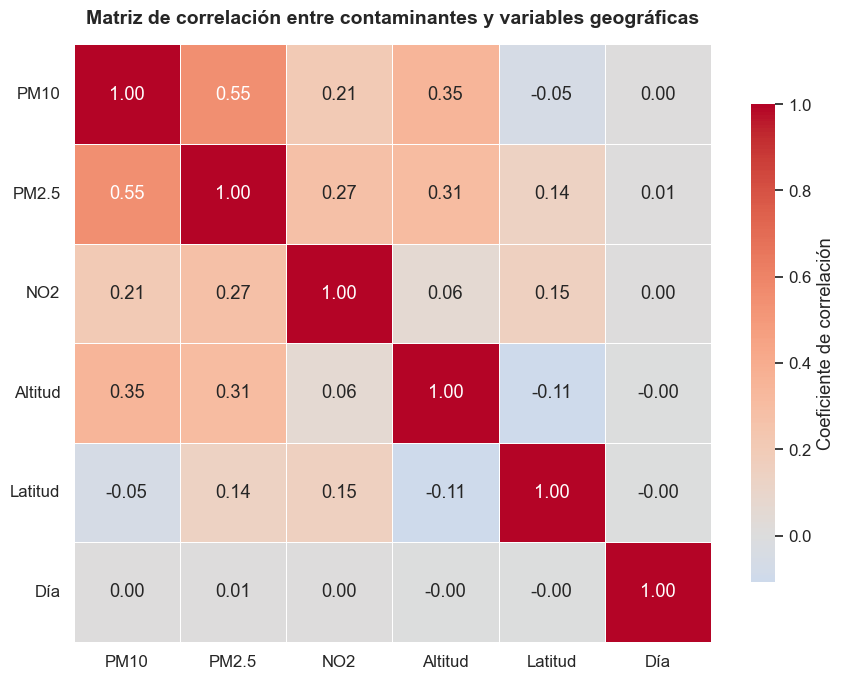

In [304]:
"""
Permite visualizar las relaciones entre los diferentes contaminantes.
Por ejemplo, si PM10 y PM2_5 están altamente correlacionados, podría indicar
que ambos provienen de fuentes similares (vehículos, polvo).
"""

corr = df[['PM10','PM2_5','NO2','ALTITUD','LATITUD','DIA']].corr()
corr.columns = corr.index = ['PM10','PM2.5','NO2','Altitud','Latitud','Día']

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.6, linecolor="white",
            cbar_kws={"shrink":0.8,"label":"Coeficiente de correlación"})
plt.title('Matriz de correlación entre contaminantes y variables geográficas',
          fontsize=14, fontweight='bold', pad=15)

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Gráficos de barra

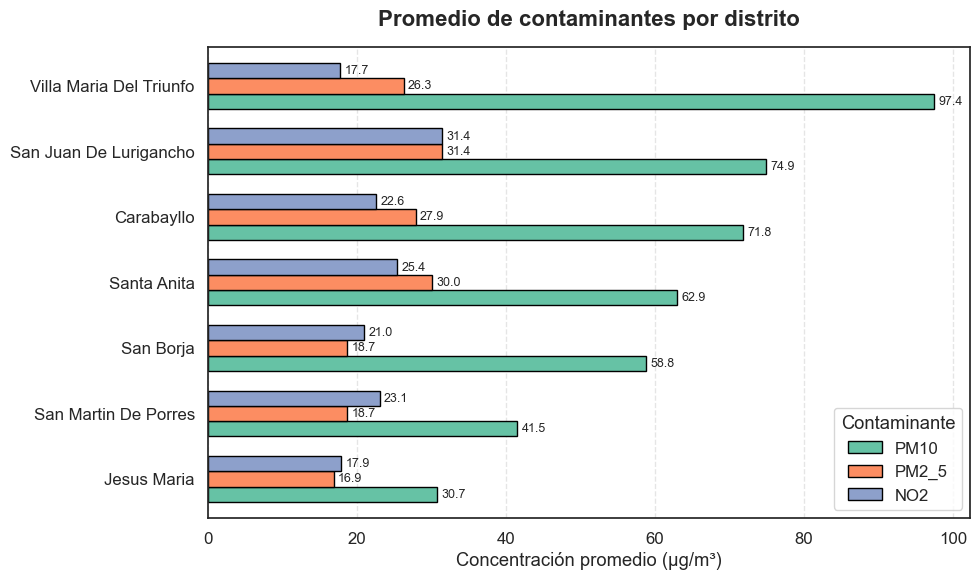

In [307]:
"""
Gráfico de barra horizontal que muestra el promedio de cada contaminante por distrito.
Esto permite comparar visualmente qué distritos tienen mayores niveles promedio de contaminación.
"""

promedio_distrito['DISTRITO'] = promedio_distrito['DISTRITO'].str.replace('_', ' ').str.title()
promedio_distrito = promedio_distrito.sort_values('PM10')

ax = promedio_distrito.plot(
    kind='barh', x='DISTRITO', y=['PM10', 'PM2_5', 'NO2'],
    figsize=(10,6), color=sns.color_palette('Set2', 3),
    edgecolor='black', width=0.7
)

plt.title('Promedio de contaminantes por distrito', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Concentración promedio (µg/m³)')
plt.ylabel('')
plt.legend(title='Contaminante')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for c in ax.containers: ax.bar_label(c, fmt='%.1f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()


### Gráficos de líneas

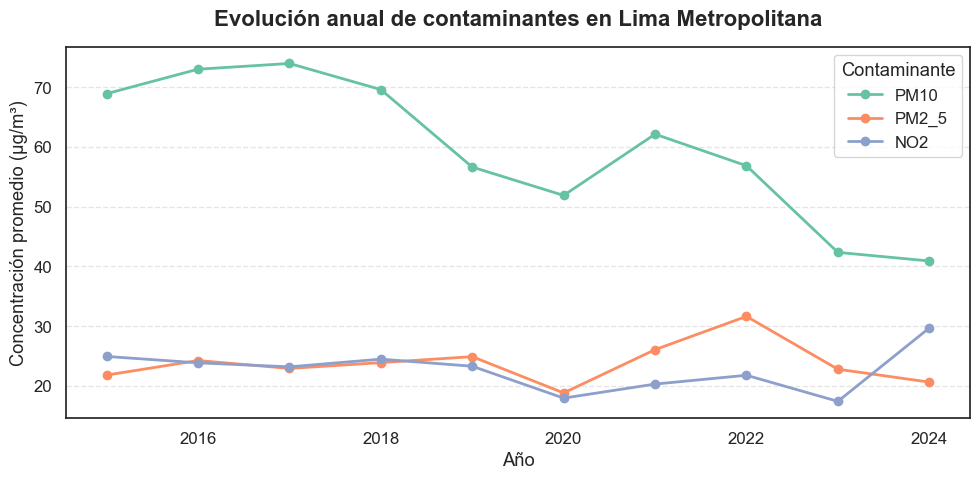

In [ ]:
"""
Gráfico de líneas que muestra la evolución anual de los contaminantes.
Esto ayuda a identificar tendencias a largo plazo en la calidad del aire.
"""

colors = sns.color_palette('Set2', 3)
promedio_anual.plot(x='ANIO', y=['PM10','PM2_5','NO2'], figsize=(10,5),
                    marker='o', linewidth=2, color=colors)
plt.title('Evolución anual de contaminantes en Lima Metropolitana', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Año')
plt.ylabel('Concentración promedio (µg/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Contaminante')
plt.tight_layout()
plt.show()


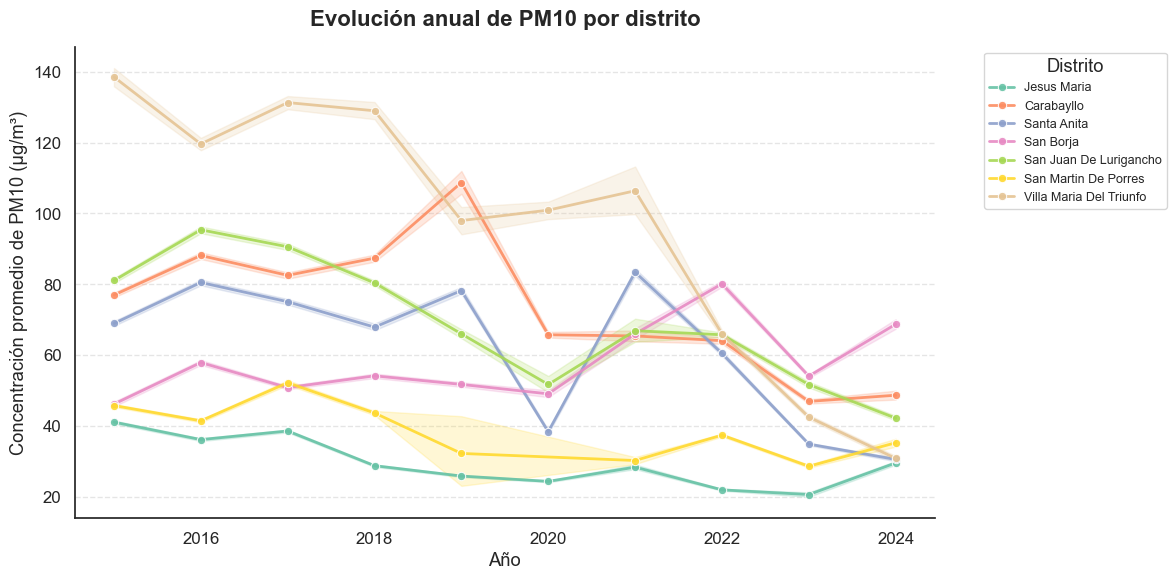

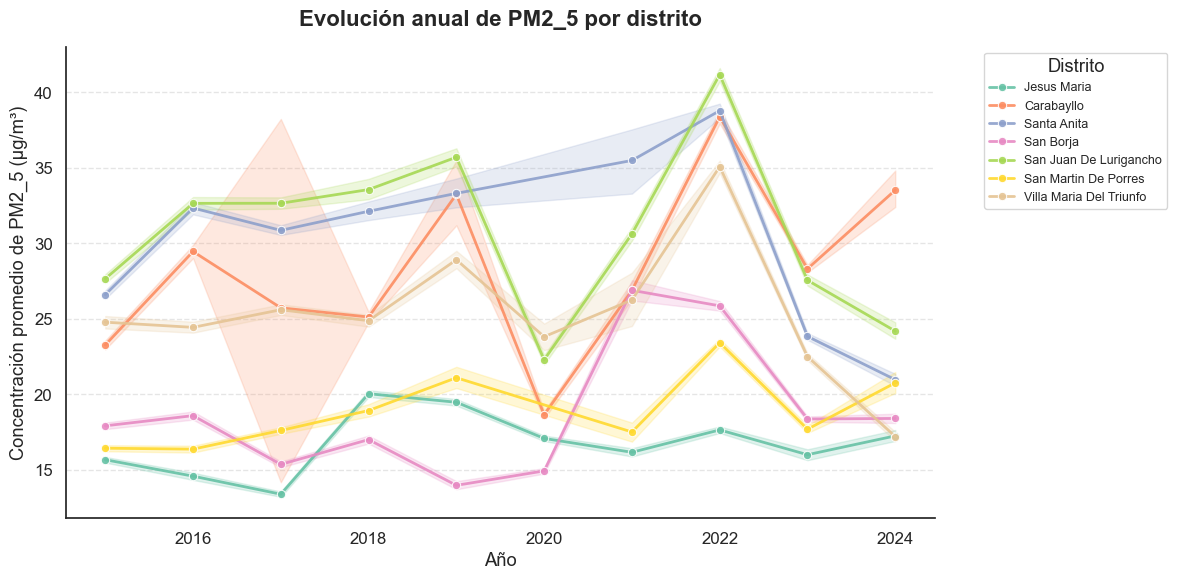

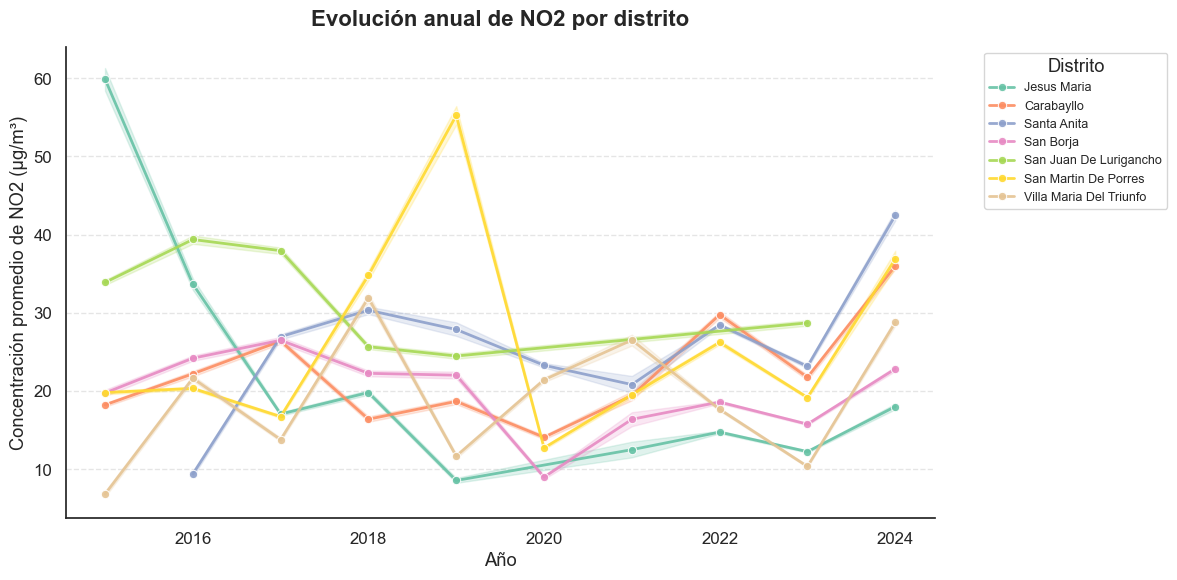

In [319]:
"""
Gráficos de líneas que muestran la evolución anual de cada contaminante por distrito.
Esto ayuda a identificar tendencias locales y comparar la calidad del aire entre diferentes áreas.
"""

for cont in ['PM10', 'PM2_5', 'NO2']:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df.assign(DISTRITO=df['DISTRITO'].str.replace('_',' ').str.title()),
                 x='ANIO', y=cont, hue='DISTRITO', marker='o',
                 linewidth=2, alpha=0.9, palette=sns.color_palette('Set2', 7))
    
    plt.title(f'Evolución anual de {cont} por distrito', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Año'); plt.ylabel(f'Concentración promedio de {cont} (µg/m³)')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title='Distrito', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=9)

    sns.despine()
    plt.tight_layout()
    plt.show()


### Gráficos de tendencia acumulativa

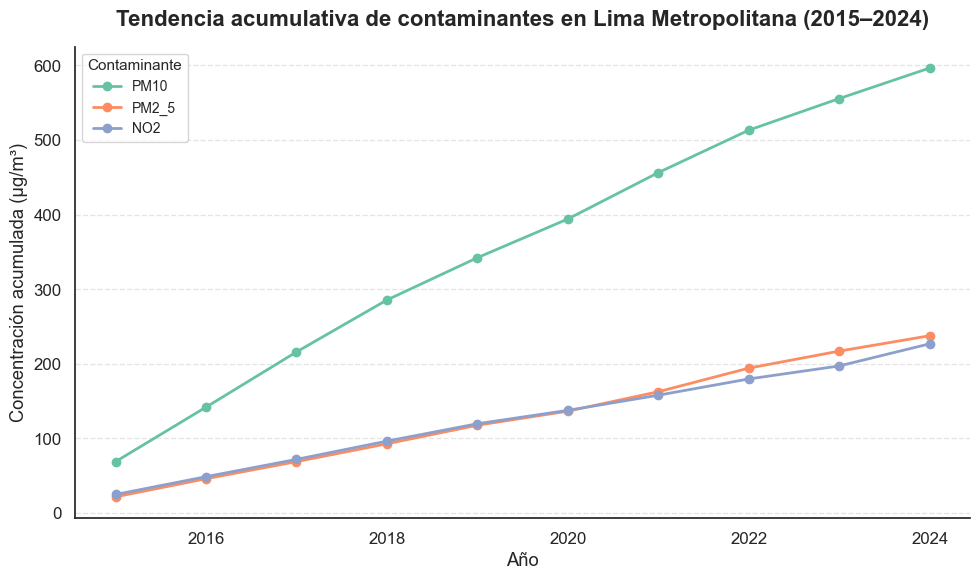

In [ ]:
"""
Gráficos de tendencia acumulativa de contaminantes.
Muestra la acumulación anual de contaminantes, ayudando a visualizar la tendencia a largo plazo
"""

promedio_anual_acum = promedio_anual.copy()
promedio_anual_acum[['PM10', 'PM2_5', 'NO2']] = promedio_anual_acum[['PM10', 'PM2_5', 'NO2']].cumsum()


plt.figure(figsize=(10,6))
for c, col in zip(sns.color_palette('Set2', 3), ['PM10','PM2_5','NO2']):
    plt.plot(promedio_anual_acum['ANIO'], promedio_anual_acum[col],
             marker='o', linewidth=2, color=c, label=col)
    
plt.title('Tendencia acumulativa de contaminantes en Lima Metropolitana (2015–2024)',
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Año'); plt.ylabel('Concentración acumulada (µg/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Contaminante', fontsize=10, title_fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

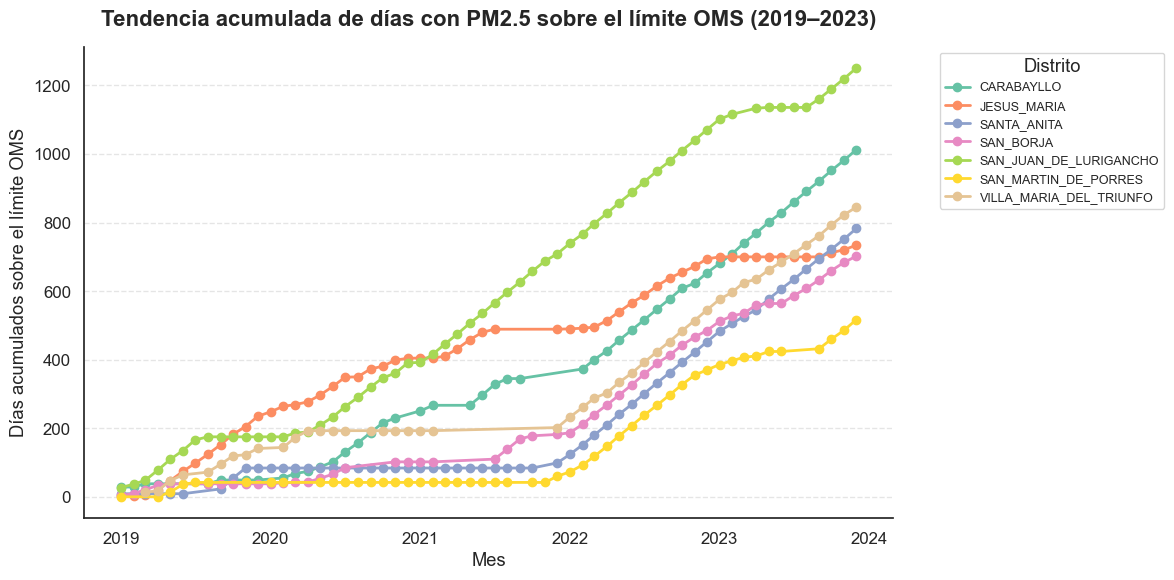

In [ ]:
# Filtrar años 2019–2023 
df_filtrado = df.query("2019 <= ANIO <= 2023").copy()

# Promedio diario por distrito
diario = (df_filtrado.groupby(["DISTRITO", "FECHA"])[["PM10", "PM2_5"]]
          .mean().reset_index())

# Límites OMS
LIM_PM10, LIM_PM25 = 45, 15

# Crear columnas booleanas (True si supera el límite)
diario["PM10_MALO"] = diario["PM10"] > LIM_PM10
diario["PM25_MALO"] = diario["PM2_5"] > LIM_PM25

# Agrupar por mes
diario["FECHA"] = pd.to_datetime(diario["FECHA"])
diario["ANIO_MES"] = diario["FECHA"].dt.to_period("M").dt.to_timestamp()

mensual = (diario.groupby(["DISTRITO", "ANIO_MES"])[["PM10_MALO", "PM25_MALO"]]
           .sum().reset_index())

# Calcular acumulado por distrito
mensual["PM10_MALO_ACUM"] = mensual.groupby("DISTRITO")["PM10_MALO"].cumsum()
mensual["PM25_MALO_ACUM"] = mensual.groupby("DISTRITO")["PM25_MALO"].cumsum()

# Gráfico de tendencia (PM2.5)
plt.figure(figsize=(12,6))
colors = sns.color_palette("Set2", n_colors=len(mensual["DISTRITO"].unique()))

for color, dist in zip(colors, mensual["DISTRITO"].unique()):
    data = mensual[mensual["DISTRITO"] == dist]
    plt.plot(data["ANIO_MES"], data["PM25_MALO_ACUM"],
             marker="o", linewidth=2, color=color, label=dist)

plt.title("Tendencia acumulada de días con PM2.5 sobre el límite OMS (2019–2023)",
          fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Mes"); plt.ylabel("Días acumulados sobre el límite OMS")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Distrito", bbox_to_anchor=(1.05,1), loc="upper left", fontsize=9)
sns.despine(); plt.tight_layout(); plt.show()


### Gráficos circulares

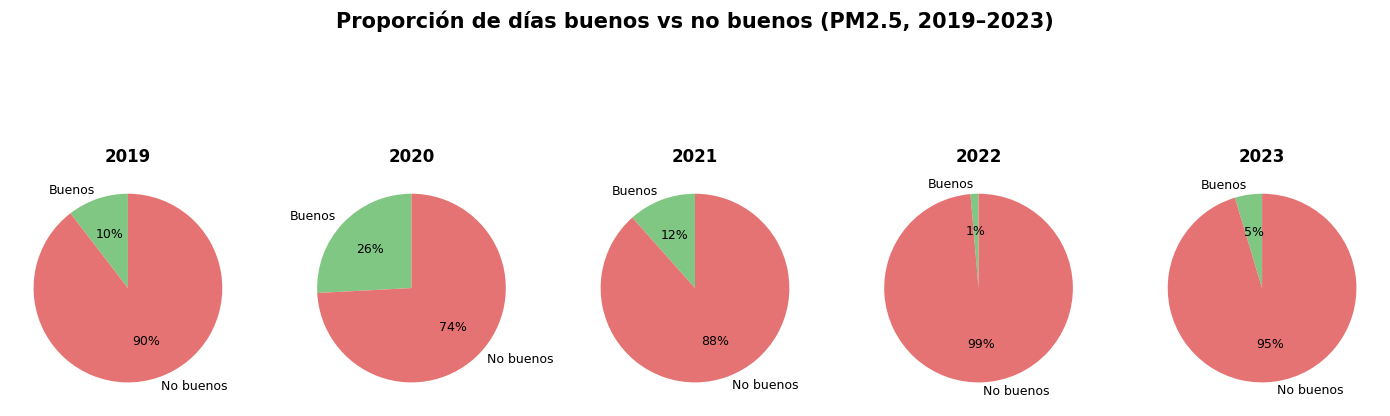

In [ ]:
limite_pm25 = 15
anios = [2019, 2020, 2021, 2022, 2023]
colors = ['#81C784', '#E57373']

fig, axes = plt.subplots(1, len(anios), figsize=(14,5))
for ax, anio in zip(axes, anios):
    df_anio = df[df["ANIO"] == anio]
    pm25_diario = df_anio.groupby("FECHA")["PM2_5"].mean()
    buenos = (pm25_diario <= limite_pm25).sum()
    malos = (pm25_diario > limite_pm25).sum()
    ax.pie([buenos, malos], labels=["Buenos","No buenos"], autopct="%1.0f%%",
           startangle=90, colors=colors, textprops={'fontsize':9})
    ax.set_title(f"{anio}", fontsize=12, fontweight='bold')

plt.suptitle("Proporción de días buenos vs no buenos (PM2.5, 2019–2023)",
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### Umbrales
---

In [86]:
df_clean.loc[df_clean['PM10'] > 500, 'PM10'].count()

np.int64(128)

In [85]:
df_clean.loc[df_clean['PM2_5'] > 250, 'PM2_5'].count()

np.int64(25)

In [93]:
df_clean.loc[df_clean['NO2'] > 400, 'NO2'].count()

np.int64(0)

In [19]:
valor_alto = df[(df['DISTRITO'] == 'CARABAYLLO') & (df['ANIO'] == 2017) & (df['PM2_5'] > 35)]
display(valor_alto.head(20))


,ID,ESTACION,FECHA,HORA,LONGITUD,LATITUD,ALTITUD,PM10,PM2_5,NO2,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DATETIME,ANIO,MES,DIA
87178,100085,CARABAYLLO,2017-01-01,03:00:00,-77.0336,-11.9022,179.0,58.92,45.3,26.1,LIMA,LIMA,CARABAYLLO,150106.0,20240531,2017-01-01 03:00:00,2017,1,1
87179,100086,CARABAYLLO,2017-01-01,04:00:00,-77.0336,-11.9022,179.0,82.50,40.5,25.5,LIMA,LIMA,CARABAYLLO,150106.0,20240531,2017-01-01 04:00:00,2017,1,1
